In [1]:
# Importing the neccesary libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# centroid file from previous outputs
engmt_centriod = pd.read_csv('../data/centero_engagment.csv')
engmt_centriod = engmt_centriod.iloc[:,1:]
engmt_centriod

,Total(DL/UL),Dur. (ms),sessions frequency
0,-0.906098,-0.321605,-0.221415
1,0.892940,-0.323010,-0.221309
2,0.010952,1.326584,-0.205536
3,-0.008896,5.438251,-0.018591
4,0.012256,-0.035857,2.854753


In [3]:
# Import standardized engagement metric values 
enga_metr = pd.read_csv('../data/std_engagement.csv')
enga_metr.index = enga_metr['MSISDN/Number']
enga_metr = enga_metr.iloc[:,1:4]
enga_metr.head()

,Total(DL/UL),Dur. (ms),sessions frequency
MSISDN/Number,,,
3.360100e+10,-0.615285,20.575975,-0.489228
3.360100e+10,0.862904,15.109373,-0.489228
3.360100e+10,-0.770393,15.069531,-0.489228
3.360101e+10,1.607679,14.589653,-0.489228
3.360101e+10,0.456091,11.817893,0.749944


In [4]:
# calculating the distance between the metric values and the centroid of the the first k-means cluster
from sklearn.metrics.pairwise import euclidean_distances
engagement_score = euclidean_distances(enga_metr.values.tolist(),[engmt_centriod.values.tolist()[0]])
engagement_score

array([[20.90131947],
       [15.5343549 ],
       [15.39406448],
       ...,
       [ 1.51036334],
       [ 1.31956986],
       [ 1.40836443]])

In [5]:
engagement_score = [val[0] for val in engagement_score.tolist()]
engagement_score[:2]

[20.90131947119856, 15.534354898774462]

In [6]:
len(engagement_score)

106471

In [7]:
# Get centroid value from the previous files
exper_centr = pd.read_csv('../data/centroid_experience.csv')
exper_centr = exper_centr.iloc[:,1:]
exper_centr

,Average RTT,Average TCP,Average throughput
0,0.750096,-0.505828,-0.744210
1,-1.230811,0.827223,-0.151208
2,0.519698,-0.346565,1.408593


In [8]:
# standardized experience metric values
exper_metr = pd.read_csv('../data/std_experience.csv')
exper_metr.index = exper_metr['MSISDN/Number']
exper_metr = exper_metr.iloc[:106856,1:4]
exper_metr

,Average TCP,Average throughput,Average RTT
MSISDN/Number,,,
3.366117e+10,-1.357519,15.220434,0.510533
3.369817e+10,0.711986,11.928930,-0.596697
3.367251e+10,-1.480467,11.918292,-0.714487
3.365169e+10,-1.396600,10.960414,-0.855836
3.366856e+10,0.692157,10.681835,-0.596697
...,...,...,...
3.361648e+10,0.761222,-0.552987,-0.855836
3.362400e+10,0.761222,-0.552987,-1.303439
3.376193e+10,0.761222,-0.552987,-0.125535


In [9]:
# Calculating the distance between the metric values and the centroid of the the first k-means cluster
experience_score = euclidean_distances(exper_metr.values.tolist(),[exper_centr.values.tolist()[0]])
experience_score

array([[15.91639793],
       [12.43569126],
       [12.62279924],
       ...,
       [ 0.62056924],
       [ 0.32725538],
       [ 1.99643487]])

In [10]:
experience_score = [val[0] for val in experience_score.tolist()]
experience_score

[15.916397929015316,
 12.435691264559209,
 12.622799236243425,
 11.665995828361238,
 11.188785843396658,
 11.273181104108888,
 11.151286495257741,
 11.194160349915656,
 11.052156104947297,
 10.779902538118696,
 10.693949466604243,
 10.67770385073105,
 10.341400261810811,
 10.238508653786294,
 10.139152288793984,
 10.212599873950147,
 10.071581819023075,
 10.108094078553766,
 10.069508324034153,
 9.845501142194722,
 9.442139633075776,
 9.559963508863092,
 9.32190879464544,
 9.489179414067776,
 9.426984408654109,
 9.199547251950554,
 9.317932047674264,
 9.05847862300344,
 9.234934204437767,
 9.161750567785212,
 8.970593473358806,
 9.090731630870259,
 9.054627597434363,
 9.030382848076083,
 9.039339060720051,
 8.898356603946628,
 8.768626684463355,
 8.934993902204171,
 8.962228639357654,
 8.876177496415567,
 8.885060014619759,
 8.71556738473542,
 8.729946676145225,
 8.854029570113319,
 8.766232527606787,
 8.790275858288638,
 8.788953861713994,
 8.719851009962523,
 8.769383079167518,
 8.72

In [11]:
K = 385
new_exp_score = experience_score[:len(experience_score)- K]

In [12]:
len(new_exp_score)

106471

In [13]:
#creating a dataframe to contain both engagement and experience score with index being 'MSISDN/Number' to identify the user
df = pd.DataFrame()

df['experience_score'] = new_exp_score
df['engagement_score'] = engagement_score
df.index = enga_metr.index
#result
df.head()

,experience_score,engagement_score
MSISDN/Number,,
3.360100e+10,15.916398,20.901319
3.360100e+10,12.435691,15.534355
3.360100e+10,12.622799,15.394064
3.360101e+10,11.665996,15.124035
3.360101e+10,11.188786,12.254245


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106471 entries, 33601001722.0 to 882397108489451.0
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   experience_score  106471 non-null  float64
 1   engagement_score  106471 non-null  float64
dtypes: float64(2)
memory usage: 2.4 MB


In [15]:
# Creating a new column for the dataframe representing satisfaction calculated as an average of engagement and experience score
df['satisfaction_score'] = (df['engagement_score'] + df['experience_score'])/2
df.head(10)

,experience_score,engagement_score,satisfaction_score
MSISDN/Number,,,
3.360100e+10,15.916398,20.901319,18.408859
3.360100e+10,12.435691,15.534355,13.985023
3.360100e+10,12.622799,15.394064,14.008432
3.360101e+10,11.665996,15.124035,13.395015
3.360101e+10,11.188786,12.254245,11.721515
3.360101e+10,11.273181,12.187403,11.730292
3.360101e+10,11.151286,11.557308,11.354297
3.360101e+10,11.194160,10.747511,10.970836
3.360101e+10,11.052156,10.740778,10.896467


In [16]:
top10_satisfied_customers = df.sort_values(by='satisfaction_score', ascending=False).iloc[:10,:]
top10_satisfied_customers.to_csv('../data/top_10_satisfied_customers.csv')
top10_satisfied_customers

,experience_score,engagement_score,satisfaction_score
MSISDN/Number,,,
3.360100e+10,15.916398,20.901319,18.408859
3.360100e+10,12.622799,15.394064,14.008432
3.360100e+10,12.435691,15.534355,13.985023
3.360101e+10,11.665996,15.124035,13.395015
3.360101e+10,11.273181,12.187403,11.730292
3.360101e+10,11.188786,12.254245,11.721515
3.362632e+10,2.498841,20.809707,11.654274
3.361489e+10,3.431673,19.603858,11.517765
3.360101e+10,11.151286,11.557308,11.354297


In [17]:
x = exper_metr['Average TCP'].to_list()
new_x = x[:len(x)- K]
len(new_x)

106471

In [18]:
y = exper_metr['Average RTT'].to_list()
new_y = y[:len(y)-K]
len(new_y)

106471

In [19]:
z = exper_metr['Average throughput'].to_list()
new_z = z[:len(z) - K]
len(new_z)

106471

In [20]:
# Form a new Model training Dataframe consisting all of the columns
train_df = enga_metr.copy(deep=True)
train_df['Average TCP'] = new_x
train_df['Average RTT'] = new_y
train_df['Average throughput'] = new_z
# Adding our average satisfaction score (this is going to be our predicted value)
train_df['satisfaction_score'] = df['satisfaction_score'].to_list()
train_df.head()

,Total(DL/UL),Dur. (ms),sessions frequency,Average TCP,Average RTT,Average throughput,satisfaction_score
MSISDN/Number,,,,,,,
3.360100e+10,-0.615285,20.575975,-0.489228,-1.357519,0.510533,15.220434,18.408859
3.360100e+10,0.862904,15.109373,-0.489228,0.711986,-0.596697,11.928930,13.985023
3.360100e+10,-0.770393,15.069531,-0.489228,-1.480467,-0.714487,11.918292,14.008432
3.360101e+10,1.607679,14.589653,-0.489228,-1.396600,-0.855836,10.960414,13.395015
3.360101e+10,0.456091,11.817893,0.749944,0.692157,-0.596697,10.681835,11.721515


In [21]:
# Dividing the train data into actual train data (train + validation) and test data
# 80 (60 + 20) and 20
train_data = train_df.iloc[:int(len(train_df) * 0.8),:]
test_data = train_df.iloc[int(len(train_df) * 0.8):,:]

In [22]:
train_x = train_data.iloc[:,:-1]
train_y = train_data.iloc[:,-1:]
# 
test_x = test_data.iloc[:,:-1]
test_y = test_data.iloc[:,-1:]

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(train_x,train_y,test_size=0.2,random_state=40)

In [24]:
# Training the Ridge Regression Model on the splited training data
# Implementing Ridge Regression Model
from sklearn.linear_model import Ridge
alpha_val = 0.8
rr = Ridge(alpha=alpha_val)
rr.fit(xtrain, ytrain)
# Validation value of the model
validation_score = rr.score(xtest, ytest)
print("The model score is: {:.5f}".format(validation_score))

The model score is: 0.90655


In [25]:
# Training the best Model(Ridge) on the whole train data
rr.fit(train_x, train_y)
# Test on the test data
final_score = rr.score(test_x,test_y)
print("The model final score is: {:.5f}".format(final_score))

The model final score is: 0.78340


In [26]:
from joblib import dump
# Saving the final Model using joblibs dump
dump(rr, '../models/model.joblib')

['../models/model.joblib']

In [27]:
cluster_df = df.iloc[:,:2]
cluster_df.head()

,experience_score,engagement_score
MSISDN/Number,,
3.360100e+10,15.916398,20.901319
3.360100e+10,12.435691,15.534355
3.360100e+10,12.622799,15.394064
3.360101e+10,11.665996,15.124035
3.360101e+10,11.188786,12.254245


In [28]:
# Creating a k-means cluster with 2 number of clusters
km = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
label = km.fit_predict(cluster_df)
centroids = km.cluster_centers_

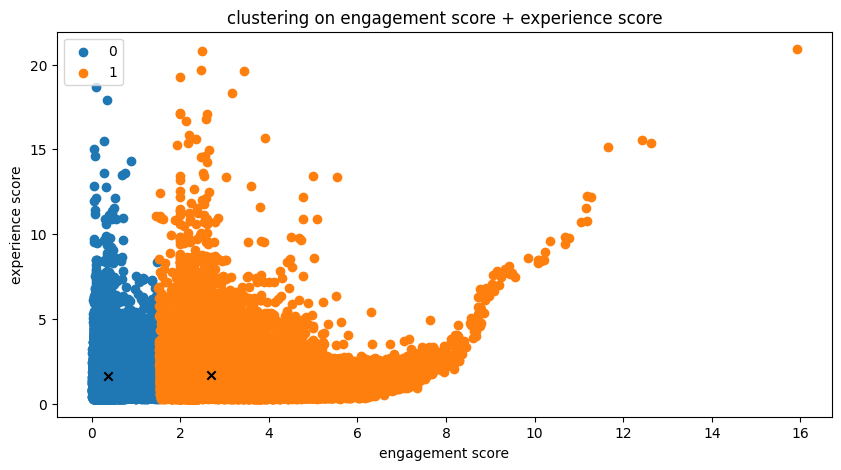

In [29]:
#plotting the results:
plt.figure(figsize=(10,5))
u_labels = np.unique(label)
plt.title(f'clustering on engagement score + experience score')
for i in u_labels:
    plt.scatter(cluster_df[label == i].iloc[:,0] , cluster_df[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1], marker='x', color = 'black')
plt.xlabel("engagement score")
plt.ylabel("experience score")
plt.legend()
plt.show()

In [30]:
df.head()

,experience_score,engagement_score,satisfaction_score
MSISDN/Number,,,
3.360100e+10,15.916398,20.901319,18.408859
3.360100e+10,12.435691,15.534355,13.985023
3.360100e+10,12.622799,15.394064,14.008432
3.360101e+10,11.665996,15.124035,13.395015
3.360101e+10,11.188786,12.254245,11.721515


In [31]:
df['cluster'] = label
df.head()

,experience_score,engagement_score,satisfaction_score,cluster
MSISDN/Number,,,,
3.360100e+10,15.916398,20.901319,18.408859,1
3.360100e+10,12.435691,15.534355,13.985023,1
3.360100e+10,12.622799,15.394064,14.008432,1
3.360101e+10,11.665996,15.124035,13.395015,1
3.360101e+10,11.188786,12.254245,11.721515,1


In [32]:
df.to_csv('../data/score_table.csv')

In [33]:
li = [*range(0,106471)]

In [34]:
len(li)

106471

In [40]:
import sqlite3
con = sqlite3.connect ('telecom.db')
cursor = con.cursor ()
try:
    cur.execute ('create table user_satisfaction_level (user_id, eng_score number, exp_score number, Satisfaction)')
except :
    print('Table exists...')


df['user_id']= li
df[['user_id','experience_score','engagement_score','satisfaction_score']].to_sql('user_satisfaction_level', con, if_exists='replace', index=False)

df

Table exists...


,experience_score,engagement_score,satisfaction_score,cluster,user_id
MSISDN/Number,,,,,
3.360100e+10,15.916398,20.901319,18.408859,1,0
3.360100e+10,12.435691,15.534355,13.985023,1,1
3.360100e+10,12.622799,15.394064,14.008432,1,2
3.360101e+10,11.665996,15.124035,13.395015,1,3
3.360101e+10,11.188786,12.254245,11.721515,1,4
...,...,...,...,...,...
3.379000e+10,0.269692,2.153201,1.211446,0,106466
3.379000e+10,1.996435,1.399649,1.698042,1,106467
3.197021e+12,1.996435,1.510363,1.753399,1,106468


In [41]:
#print the first ten rows of user_satisfaction
cursor.execute("SELECT * FROM user_satisfaction_level LIMIT 10")
rows = cursor.fetchall()
for row in rows:
    print(row)

(0, 15.916397929015316, 20.90131947119856, 18.408858700106936)
(1, 12.435691264559209, 15.534354898774462, 13.985023081666835)
(2, 12.622799236243425, 15.394064481163271, 14.008431858703348)
(3, 11.665995828361238, 15.124034710136627, 13.395015269248933)
(4, 11.188785843396658, 12.25424498247377, 11.721515412935215)
(5, 11.273181104108888, 12.187402662152282, 11.730291883130585)
(6, 11.151286495257741, 11.557308369104462, 11.354297432181102)
(7, 11.194160349915656, 10.747510729245787, 10.970835539580722)
(8, 11.052156104947297, 10.740777972349386, 10.896467038648343)
(9, 10.779902538118696, 9.777693331772774, 10.278797934945736)
